In [1]:
#iMPORTI
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
#DATA
test = pd.read_csv('/content/test_data_1.csv')
train = pd.read_csv('/content/train_data_1.csv')

In [3]:
# Data Preprocessing
X = train.drop(columns=['price'])
y = train['price']


In [4]:
#Train Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
#XGBOOST MODEL
model = model = XGBRegressor(n_estimators=1700, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)


[23:24:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8, eta=0.1, max_depth=7, n_estimators=1700,
             subsample=0.7)

In [6]:

Y_test = model.predict(test)
Y_test = Y_test.reshape(7500)

In [7]:
df_sub = pd.DataFrame({"Predicted": Y_test })
df_sub

,Predicted
0,2.028501e+06
1,2.590408e+06
2,7.831024e+05
3,9.916610e+05
4,1.674441e+07
...,...
7495,1.313859e+06
7496,2.034141e+06
7497,1.674152e+06
7498,1.005246e+06


[0.01786268 0.04147602 0.01651724 0.43642613 0.01243366 0.02211449
 0.02227892 0.03038273 0.02808462 0.11960055 0.00409762 0.03469812
 0.18032649 0.01490271 0.01879785]


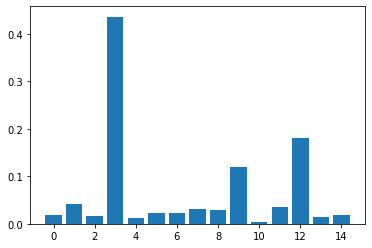

In [8]:
from matplotlib import pyplot
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

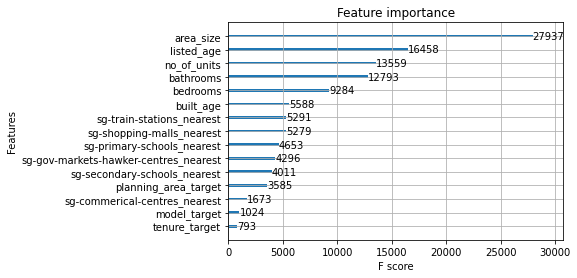

<Figure size 432x288 with 0 Axes>

In [9]:
from xgboost import plot_importance
plot_importance(model)
pyplot.show()
pyplot.savefig('my_plot.jpeg')

In [10]:
df_sub.to_csv("/content/sample_data/results.csv")